In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
# Reading the train data 
import pandas as pd
data= pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [3]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [4]:
# getting feature data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [5]:
data.shape

(175000, 17)

# **DATA PREPROCESSESING**

In [6]:
# number of null values present in the columns of the dataset which should be imputed
missing_data_values = data.isnull().sum()
filter_miss_data = missing_data_values.loc[missing_data_values != 0]
filter_miss_data

passenger_count         6077
RatecodeID              6077
store_and_fwd_flag      6077
congestion_surcharge    6077
Airport_fee             6077
dtype: int64

In [7]:
# absolute trip time is calculated from pickup time and drop time and removed these two columns from the dataset
data['trip_time'] = (((pd.to_datetime(data['tpep_dropoff_datetime']))- (pd.to_datetime(data['tpep_pickup_datetime']))).dt.total_seconds()/60)
data['trip_time'] = data['trip_time'].abs()
df = data.drop(columns = ['tpep_dropoff_datetime','tpep_pickup_datetime'])
df['trip_time'].head(3)


0    45.600000
1    63.433333
2    53.650000
Name: trip_time, dtype: float64

In [8]:
# numeric and categorical columns taken in to arrays
string_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int','float']).columns.tolist()
print('these are string columns: ',string_columns)
print('these are numeric columns: ',numeric_columns)

these are string columns:  ['store_and_fwd_flag', 'payment_type']
these are numeric columns:  ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_time']


In [9]:
# checking for unique values present in object datatype features
print(df['payment_type'].unique())
print(df['store_and_fwd_flag'].unique())

['Credit Card' 'Cash' 'Wallet' 'UPI' 'unknown']
['N' nan 'Y']


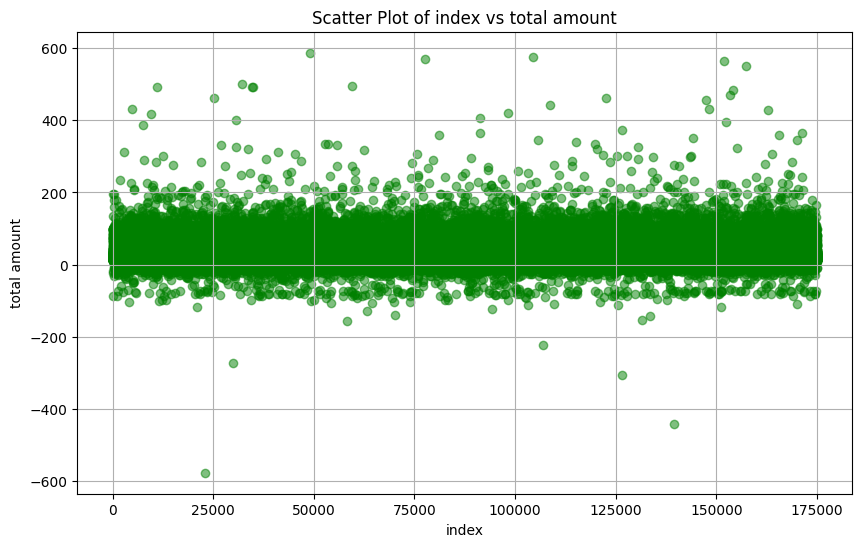

In [10]:
# Scatter Plot of index vs total amount
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['total_amount'], color='green', alpha=0.5)
plt.title('Scatter Plot of index vs total amount')
plt.xlabel('index')
plt.ylabel('total amount')
plt.grid(True)
plt.show()

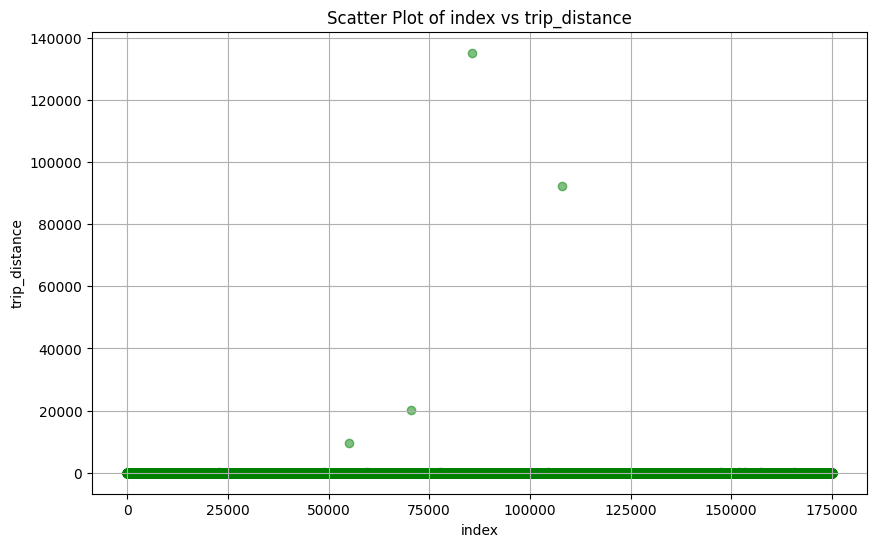

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['trip_distance'], color='green', alpha=0.5)
plt.title('Scatter Plot of index vs trip_distance')
plt.xlabel('index')
plt.ylabel('trip_distance')
plt.grid(True)
plt.show()


In [12]:
df.loc[df['trip_distance'] > 100, 'trip_distance'] = np.nan
# #7 rows trip_distance is changed to nan which will be imputed in imputer


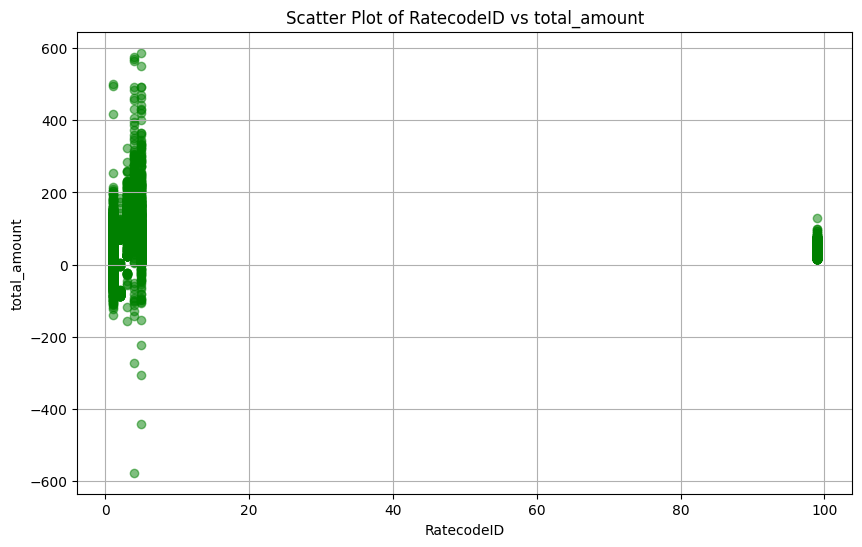

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['RatecodeID'],df['total_amount'], color='green', alpha=0.5)
plt.title('Scatter Plot of RatecodeID vs total_amount')
plt.xlabel('RatecodeID')
plt.ylabel('total_amount')
plt.grid(True)
plt.show()

In [14]:
print(df['RatecodeID'].unique())


[ 1. 99.  3. nan  2.  5.  4.]


In [15]:
df.loc[df['RatecodeID'] > 5, 'RatecodeID'] = np.nan
# all the 99's will be converted to nan to impute in imputer

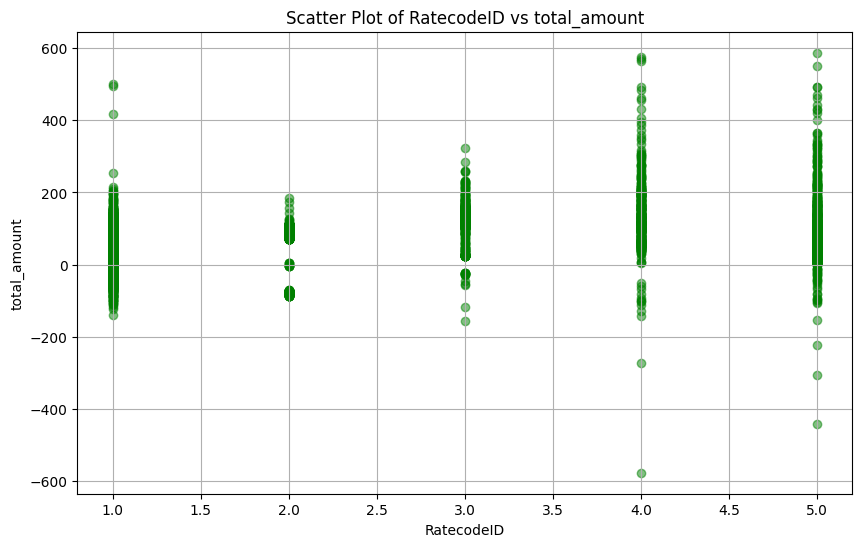

In [16]:
# plot after removing 99's 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['RatecodeID'],df['total_amount'], color='green', alpha=0.5)
plt.title('Scatter Plot of RatecodeID vs total_amount')
plt.xlabel('RatecodeID')
plt.ylabel('total_amount')
plt.grid(True)
plt.show()

In [17]:
# Checking for numeric features having null values
numeric_nan_col = [col for col in numeric_columns if df[col].isnull().any()]
numeric_nan_col

['passenger_count',
 'trip_distance',
 'RatecodeID',
 'congestion_surcharge',
 'Airport_fee']

In [18]:
# imputing null values using simple immputer
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
numbercol=['passenger_count','trip_distance','congestion_surcharge','Airport_fee']
df[numbercol] = si.fit_transform(df[numbercol])
df.head(3)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_time
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000


In [19]:
# checking for null values after inputer
missing_df_values = df.isnull().sum()
filter_miss_df = missing_df_values.loc[missing_df_values != 0]
filter_miss_df

RatecodeID            6825
store_and_fwd_flag    6077
dtype: int64

In [20]:
string_nan_cols = [col for col in string_columns if df[col].isnull().any()]

string_nan_cols

['store_and_fwd_flag']

In [21]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
df[string_nan_cols] = si.fit_transform(df[string_nan_cols])
df[['RatecodeID']] = si.fit_transform(df[['RatecodeID']])
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_time
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,45.600000
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,63.433333
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,53.650000
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,56.866667
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,18.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,28.583333
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,61.400000
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,70.033333
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,38.366667


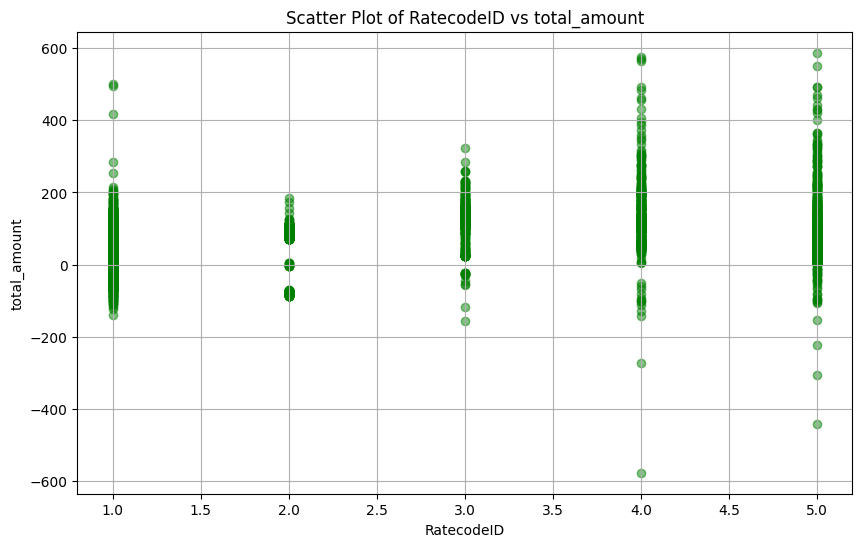

In [22]:
# plot after imputing 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['RatecodeID'],df['total_amount'], color='green', alpha=0.5)
plt.title('Scatter Plot of RatecodeID vs total_amount')
plt.xlabel('RatecodeID')
plt.ylabel('total_amount')
plt.grid(True)
plt.show()

In [23]:
# Checking for missing values 
missing_df_values = df.isnull().sum()
filter_miss_df = missing_df_values.loc[missing_df_values != 0]
filter_miss_df

Series([], dtype: int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   passenger_count        175000 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             175000 non-null  float64
 4   store_and_fwd_flag     175000 non-null  object 
 5   PULocationID           175000 non-null  int64  
 6   DOLocationID           175000 non-null  int64  
 7   payment_type           175000 non-null  object 
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  total_amount           175000 non-null  float64
 13  congestion_surcharge   175000 non-null  float64
 14  Airport_fee            175000 non-nu

In [25]:
# Splitting the dataset into target variable and train variable set
x = df.drop("total_amount" , axis=1)
y = df["total_amount"]

In [26]:
# Using scaler and encoder on the dataset
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer


# Identify numeric and string columns
numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns
string_cols = x.select_dtypes(include=['object']).columns

# Create transformers with specified columns
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (string_transformer, string_cols)
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor)

# Apply the pipeline to the DataFrame
x_transformed = pipeline.fit_transform(x)

# Convert the result back to a DataFrame
columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'trip_time','store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'payment_type_Cash', 'payment_type_Credit Card',
       'payment_type_UPI', 'payment_type_Wallet', 'payment_type_unknown']
x_transformed = pd.DataFrame(x_transformed, columns=columns)

# Display the original and transformed DataFrames
print("Original DataFrame:")
print(x)
print("\nTransformed DataFrame:")
print(x_transformed)


Original DataFrame:
        VendorID  passenger_count  trip_distance  RatecodeID  \
0              1              1.0           2.14         1.0   
1              0              1.0           2.70         1.0   
2              1              1.0           1.15         1.0   
3              0              1.0           0.40         1.0   
4              1              3.0           1.10         1.0   
...          ...              ...            ...         ...   
174995         1              3.0           3.45         1.0   
174996         1              1.0           9.44         1.0   
174997         0              1.0           2.40         1.0   
174998         1              1.0           4.71         1.0   
174999         1              1.0           1.01         1.0   

       store_and_fwd_flag  PULocationID  DOLocationID payment_type  extra  \
0                       N           120             9  Credit Card    2.5   
1                       N            15           215  Cr

In [27]:
x_transformed

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_time,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,0.0,0.0,0.118577,0.0,-0.098485,-0.939394,0.6,0.466412,0.0,0.0,0.0,0.00,0.165052,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.0,0.0,0.339921,0.0,-0.893939,0.621212,1.0,0.193870,0.0,0.0,0.0,0.00,0.548977,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,-0.272727,0.0,0.257576,0.681818,-0.4,-0.291523,0.0,0.0,0.0,0.00,0.338357,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.0,0.0,-0.569170,0.0,-0.037879,0.803030,0.6,0.279162,0.0,0.0,0.0,0.00,0.407607,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,-0.292490,0.0,0.530303,-0.613636,0.0,-0.128266,0.0,0.0,0.0,0.00,-0.411195,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.0,2.0,0.636364,0.0,0.106061,0.257576,0.0,0.855278,0.0,0.0,0.0,0.00,-0.201292,1.0,0.0,0.0,1.0,0.0,0.0,0.0
174996,0.0,0.0,3.003953,0.0,0.159091,0.439394,1.6,-1.241602,0.0,0.0,0.0,1.75,0.505203,1.0,0.0,1.0,0.0,0.0,0.0,0.0
174997,-1.0,0.0,0.221344,0.0,0.265152,-0.204545,0.6,-0.258316,0.0,0.0,0.0,0.00,0.691066,1.0,0.0,0.0,1.0,0.0,0.0,0.0
174998,0.0,0.0,1.134387,0.0,0.810606,-0.250000,0.6,1.288908,0.0,0.0,0.0,0.00,0.009329,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
x_transformed.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_time,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,-0.271623,0.357678,0.724386,0.081429,-0.002194,-0.002262,0.372857,0.208784,0.646816,-0.020311,-0.253029,0.158825,0.142880,0.993177,0.006823,0.172234,0.772897,0.006811,0.034726,0.013331
std,0.445606,0.875671,1.918079,0.411630,0.576885,0.577216,0.779399,1.144291,2.328274,0.198775,0.804867,0.503000,1.012158,0.082319,0.082319,0.377585,0.418961,0.082250,0.183085,0.114690
min,-1.000000,-1.000000,-0.727273,0.000000,-1.000000,-1.000000,-3.400000,-1.311884,-29.300000,-2.000000,-5.000000,-1.750000,-0.816649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,-0.300395,0.000000,-0.500000,-0.500000,-0.400000,-0.449914,0.000000,0.000000,0.000000,0.000000,-0.433441,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.699605,0.000000,0.500000,0.500000,0.600000,0.550086,0.000000,0.000000,0.000000,0.000000,0.566559,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,32.537549,4.000000,0.992424,0.992424,4.300000,119.021944,80.000000,0.000000,0.000000,1.750000,32.275924,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
x_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  175000 non-null  float64
 1   passenger_count           175000 non-null  float64
 2   trip_distance             175000 non-null  float64
 3   RatecodeID                175000 non-null  float64
 4   PULocationID              175000 non-null  float64
 5   DOLocationID              175000 non-null  float64
 6   extra                     175000 non-null  float64
 7   tip_amount                175000 non-null  float64
 8   tolls_amount              175000 non-null  float64
 9   improvement_surcharge     175000 non-null  float64
 10  congestion_surcharge      175000 non-null  float64
 11  Airport_fee               175000 non-null  float64
 12  trip_time                 175000 non-null  float64
 13  store_and_fwd_flag_N      175000 non-null  f

In [30]:
y.head(5)

0    20.64
1    25.55
2    17.64
3    12.80
4    18.00
Name: total_amount, dtype: float64

In [31]:
z=pd.concat([x_transformed,y],axis = 1)
z.head(1)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,Airport_fee,trip_time,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,total_amount
0,0.0,0.0,0.118577,0.0,-0.098485,-0.939394,0.6,0.466412,0.0,0.0,...,0.0,0.165052,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.64


In [32]:
# CORELATION OF FEATURES WITH TARGET FEATUER
core = z.corr()
ans = core['total_amount']
ans

VendorID                    0.039695
passenger_count             0.052454
trip_distance               0.856990
RatecodeID                  0.524311
PULocationID                0.000715
DOLocationID               -0.002954
extra                       0.234346
tip_amount                  0.638658
tolls_amount                0.684765
improvement_surcharge       0.224036
congestion_surcharge       -0.145627
Airport_fee                 0.589178
trip_time                   0.107297
store_and_fwd_flag_N        0.007610
store_and_fwd_flag_Y       -0.007610
payment_type_Cash          -0.067062
payment_type_Credit Card    0.085099
payment_type_UPI           -0.055895
payment_type_Wallet         0.046087
payment_type_unknown       -0.123569
total_amount                1.000000
Name: total_amount, dtype: float64

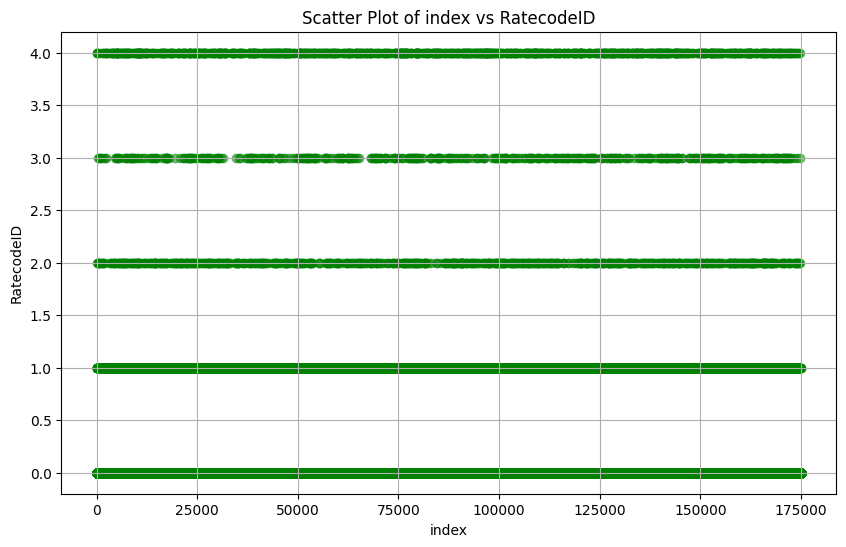

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x_transformed.index,x_transformed['RatecodeID'], color='green', alpha=0.5)
plt.title('Scatter Plot of index vs RatecodeID')
plt.xlabel('index')
plt.ylabel('RatecodeID')
plt.grid(True)
plt.show()


* **Toal amount has highest corelation 0.85 with feature trip distance**
* **Then tolls amount, tip amount and ratecode id comes with corelation of 0.68,0.63,0.52 respectively**

# **DATA MODELLING**

In [34]:
# Splitting the dataset into train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x_transformed,y,test_size=0.2,random_state=42)

# **DECISION TREE REGRESSOR**

In [35]:
# from sklearn.tree import DecisionTreeRegressor

# tree = DecisionTreeRegressor(random_state=42)

# tree.fit(x_train, y_train)

In [36]:
# tree.score(x_train,y_train)
# # 1.0

In [37]:
# tree.score(x_test,y_test)
# #0.8910446394875845

**LINEAR REGRESSION MODEL**

In [38]:
# from sklearn.linear_model import LinearRegression
# linr=LinearRegression()
# linr.fit(x_train,y_train)

In [39]:
# linr.score(x_train,y_train)
# # 0.8691413951420555

In [40]:
# linr.score(x_test,y_test)

# #  0.890390721537678

**RIDGE MODEL**

In [41]:
# from sklearn.linear_model import Ridge
# ri=Ridge()
# # Fit and transform on the training data
# ri.fit(x_train,y_train)

In [42]:
# ri.score(x_train,y_train)

# # 0.8691413922661941


In [43]:
# ri.score(x_test,y_test)

# # 0.8903905753231358

**KNN MODEL**

In [44]:
# from sklearn.neighbors import KNeighborsRegressor
# kn=KNeighborsRegressor()
# kn.fit(x_train,y_train)

In [45]:
# kn.score(x_train,y_train)

# # 0.9413557899035991

In [46]:
# kn.score(x_test,y_test) 
# # 0.9387178642845309

**SVR MODEL**

In [47]:
# from sklearn.svm import SVR
# svr = SVR(C=1.0, epsilon=0.2)
# svr.fit(x_train,y_train)

In [48]:
# svr.score(x_train,y_train)

In [49]:
# svr.score(x_test,y_test)

**BAGGIGN**

In [50]:
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor


# # Create a base regressor (you can use any regression model)
# base_regressor = DecisionTreeRegressor()

# # Create the BaggingRegressor
# bagging_regressor = BaggingRegressor(base_regressor, random_state=42)

# # Fit the model to the training data
# bagging_regressor.fit(x_train, y_train)


In [51]:
# bagging_regressor.score(x_train,y_train)

# # 0.9883259589739178

In [52]:
# bagging_regressor.score(x_test,y_test)
# # 0.9506468569356759

**BOOSTING**

In [53]:
# from sklearn.ensemble import GradientBoostingRegressor
# boo = GradientBoostingRegressor()
# boo.fit(x_train, y_train)

In [54]:
# boo.score(x_train, y_train)

In [55]:
# boo.score(x_test, y_test)

**RANDOM FOREST REGRESSOR**

In [56]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

In [57]:
regr.score(x_train, y_train)
# 0.9911850961466759

0.9911197520864453

In [58]:
regr.score(x_test, y_test)
# 0.9577641895583922


0.9575143683194879

In [59]:
# from sklearn.model_selection import cross_val_score
# cv_scores_rf = cross_val_score(regr, x_train, y_train, cv=5)
# cv_scores_rf

**MLR MODEL**

In [60]:
# from sklearn.neural_network import MLPRegressor
# mlp = MLPRegressor(max_iter = 1000)
# mlp.fit(x_train,y_train)

In [61]:
# mlp.score(x_train,y_train)

# # 0.9509308878016867

In [62]:
# mlp.score(x_test,y_test)
# # 0.9562399559592966

**The test scores of above models are**

desicion tree 0.8910446394875845

linear reg    0.890390721537678

ridge         0.8903905753231358

KNN           0.9387178642845309

Bagging       0.9506468569356759

Random forest 0.9577641895583922

MLP           0.9562399559592966

**The best model without hypertuining is Random Forest**

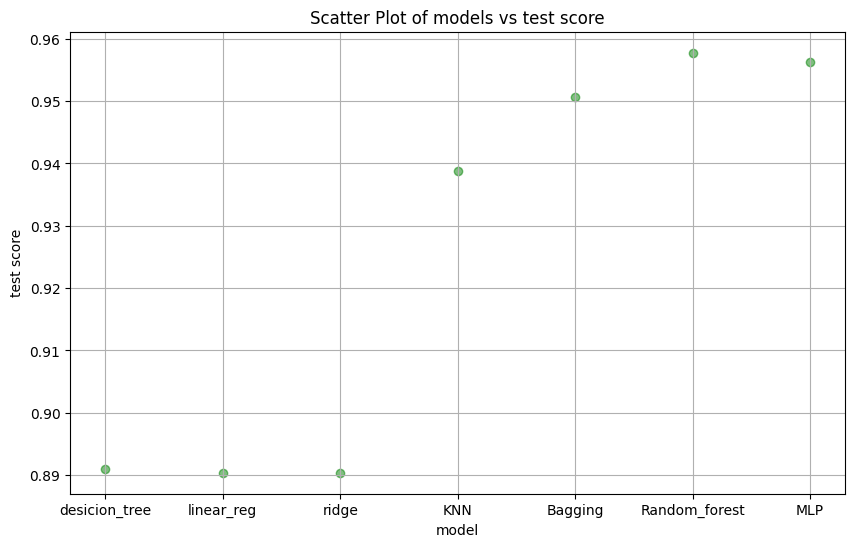

In [63]:
q1 = ['desicion_tree','linear_reg','ridge','KNN','Bagging','Random_forest','MLP']
q2 = [0.8910446394875845,0.890390721537678,0.8903905753231358,0.9387178642845309,0.9506468569356759,0.9577641895583922,0.9562399559592966]
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(q1,q2, color='green', alpha=0.5)
plt.title('Scatter Plot of models vs test score')
plt.xlabel('model')
plt.ylabel('test score')
plt.grid(True)
plt.show()


# **HYPER TUINING**

**DECISION TREE REGRESSOR TYPER TUINING**

In [64]:
import warnings
warnings.filterwarnings("ignore")


In [65]:
p_grid ={ 'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10], }


In [66]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor
# ri=DecisionTreeRegressor()
# gri_search_cv = GridSearchCV(ri,p_grid,cv=5,scoring='accuracy')
# gri_search_cv.fit(x_train,y_train)

In [67]:
# best_parameters=gri_search_cv.best_params_
# print(best_parameters)

In [68]:
# from sklearn.tree import DecisionTreeRegressor
# rr=DecisionTreeRegressor(max_depth=10,max_features=1.0,min_samples_leaf=1,min_samples_split=2)
# # Fit and transform on the training data


In [69]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(rr, x_train, y_train, cv=5)
# cv_scores

# # array([0.91962673, 0.91405084, 0.92726304, 0.92489058, 0.88631463])


In [70]:
# rr.fit(x_train,y_train)

In [71]:
# rr.score(x_train,y_train)
# # 0.9507751838511131

In [72]:
# rr.score(x_test,y_test)
# # 0.9288525785897186

**LINEAR REGRESSOR HYPER TUINING**

In [73]:
# parameters for linear regressor model
p_grid2 ={ 'fit_intercept': [True,False],
    'copy_X': [True,False],
    'positive': [True,False] }

In [74]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# li=LinearRegression()
# gri_search_cv2 = GridSearchCV(li,p_grid2,cv=5,scoring='accuracy')
# gri_search_cv2.fit(x_train,y_train)

In [75]:
# best_parameters2=gri_search_cv2.best_params_
# print(best_parameters2)

## {'copy_X': True, 'fit_intercept': True, 'positive': True}

In [76]:
# from sklearn.linear_model import LinearRegression
# li=LinearRegression(copy_X = True,fit_intercept= True,positive=True)
# # Fit and transform on the training data

In [77]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(li, x_train, y_train, cv=5)
# cv_scores

# # array([0.84435393, 0.87045604, 0.88107306, 0.87803394, 0.86506939])


In [78]:
# li.fit(x_train,y_train)

In [79]:
# li.score(x_train,y_train)

# # 0.8680542131448912


In [80]:
# li.score(x_test,y_test)

# # 0.8894070051689709

**BAGGIBG REGRESSOR HYPER TUINING**

In [81]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_samples': [0.7, 0.8, 0.9],
#     'max_features': [0.7, 0.8, 0.9]
# }

In [82]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor


# # Create a base regressor (you can use any regression model)
# base_regressor = DecisionTreeRegressor()

# # Create the BaggingRegressor
# bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# gri_search_cv5 = GridSearchCV(bagging_regressor,param_grid,cv=5,scoring='accuracy')

# # Fit the model to the training data
# gri_search_cv5.fit(x_train, y_train)


In [83]:
# best_parameters5=gri_search_cv5.best_params_
# print(best_parameters5)

In [84]:
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor

# # Create a base regressor (you can use any regression model)
# base_regressor = DecisionTreeRegressor()

# # Create the BaggingRegressor
# bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)


In [85]:
# bagging_regressor.fit(x_train,y_train)

In [86]:
# bagging_regressor.score(x_train,y_train)
# # 0.9883259589739178

In [87]:
# bagging_regressor.score(x_test,y_test)

# # 0.9506468569356759

**RIDGE REGRESSOR HYPER TUINING**

In [88]:
p_grid3={ 'alpha': [0.7,1.0,1.25,1.5,1.7],
           'max_iter':[20,30,40,50],
           'tol':[1e-3,1e-4,1e-5],
           }

In [89]:
# from sklearn.linear_model import Ridge
# ri=Ridge()
# gri_search_cv3 = GridSearchCV(ri,p_grid3,cv=5,scoring='accuracy')
# gri_search_cv3.fit(x_train,y_train)

In [90]:
# best_parameters3=gri_search_cv3.best_params_
# print(best_parameters3) 

## {'alpha': 0.7, 'max_iter': 20, 'tol': 0.001}


In [91]:
# from sklearn.linear_model import Ridge
# ri=Ridge(alpha= 0.7,max_iter = 20 ,tol = 0.001)
# # Fit and transform on the training data


In [92]:
# from sklearn.model_selection import cross_val_score
# cv_scores3 = cross_val_score(ri, x_train, y_train, cv=5)
# cv_scores3

# # array([0.84550881, 0.87149811, 0.88190191, 0.87875489, 0.86636532])


In [93]:
# ri.fit(x_train,y_train)

In [94]:
# ri.score(x_train,y_train)

# # 0.8691413937325098

In [95]:
# ri.score(x_test,y_test)

# # 0.8903906197589421

 **KNN HYPER TUINING**

In [96]:
p_grid4={ 'n_neighbors': [1,2,3,4],
           'weights':['uniform', 'distance'],
           'leaf_size':[20,30,40,50],
            'p':[2,3,4],
         
           }

In [97]:
##Takin too long no output after 30 min

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# kn=KNeighborsRegressor()
# gri_search_cv4 = RandomizedSearchCV(kn,p_grid4,cv=5,scoring='accuracy')
# gri_search_cv4.fit(x_train,y_train)

In [98]:
# best_parameters4=gri_search_cv4.best_params_
# print(best_parameters4)

In [99]:
# from sklearn.neighbors import KNeighborsRegressor
# kn=KNeighborsRegressor()


In [100]:
# from sklearn.model_selection import cross_val_score
# cv_scores4 = cross_val_score(kn, x_train, y_train, cv=5)
# cv_scores4

## array([0.87980409, 0.93093629, 0.92057639, 0.92539327, 0.88704449])


In [101]:
# kn.fit(x_train,y_train)

In [102]:
# kn.score(x_train,y_train)

In [103]:
# kn.score(x_train,y_train)

**RANDOM FOREST HYPER TUINNNING**

In [104]:
param_grid_r = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}


In [105]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor()
# gri_search_cv5 = RandomizedSearchCV(regr,param_grid_r,cv=5,scoring='neg_mean_squared_error',random_state=55)
# gri_search_cv5.fit(x_train,y_train)


In [106]:
# best_parameters5=gri_search_cv5.best_params_
# print(best_parameters5)

# ## {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1,'max_depth': 20, 'bootstrap': True}


In [107]:
# from sklearn.ensemble import RandomForestRegressor
# regrh = RandomForestRegressor(n_estimators = 50,min_samples_split=10,min_samples_leaf=1,max_depth=20,bootstrap=True)
# regrh.fit(x_train,y_train)

In [108]:
# regrh.score(x_train,y_train)
# # 0.9745487861859761

In [109]:
# regrh.score(x_test,y_test)
# # 0.9570726404401344

**MLP**

In [110]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-5, 2, 8),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}

In [111]:

# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import RandomizedSearchCV

# mlp_regressor = MLPRegressor(random_state=42)

# # Create RandomizedSearchCV
# random_search = RandomizedSearchCV(mlp_regressor, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# # Fit the model
# random_search.fit(x_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best Parameters:", best_params)

In [112]:
# random_search.score(x_train,y_train)

In [113]:
# random_search.score(x_test,y_test)

test scores after hyperparameter tuning are 

desicion tree 0.9288525785897186

linear reg    0.8894070051689709

ridge         0.8903906197589421

Bagging       0.9506468569356759

Random forest 0.9570726404401344

Best model is Random Forest without hyper tuining

In [114]:
q1 = ['desicion_tree','linear_reg','ridge','Bagging','Random_forest']
q2 = [0.9288525785897186,0.8894070051689709,0.8903906197589421,0.9506468569356759,0.9570726404401344]

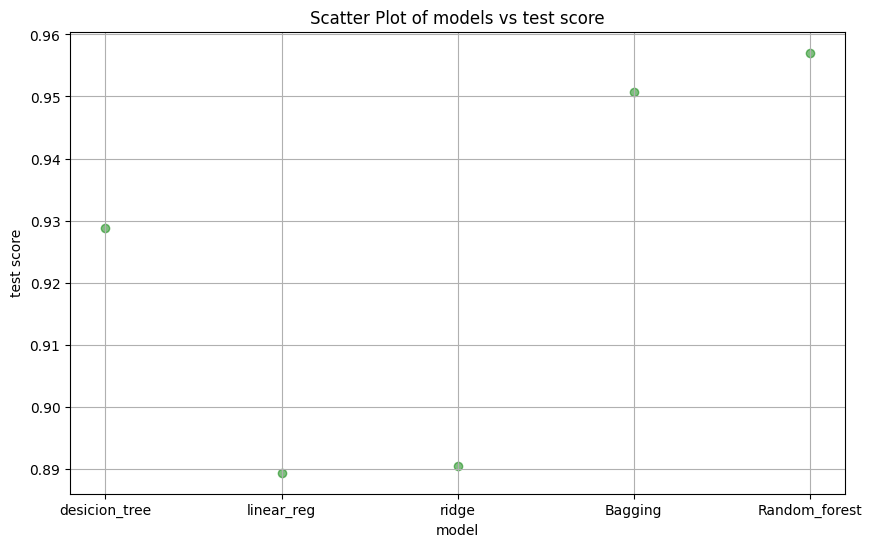

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(q1,q2, color='green', alpha=0.5)
plt.title('Scatter Plot of models vs test score')
plt.xlabel('model')
plt.ylabel('test score')
plt.grid(True)
plt.show()


# ***Random Forest Model without hypertuining gives score more than hypertuned model***

# ****PREDICTION****

comment

In [116]:
x_predict = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
x_predict.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0


In [117]:
x_predict['trip_time'] = (((pd.to_datetime(x_predict['tpep_dropoff_datetime']))- (pd.to_datetime(x_predict['tpep_pickup_datetime']))).dt.total_seconds()/60)
x_predict['trip_time'] = x_predict['trip_time'].abs()

x_predict = x_predict.drop(columns = ['tpep_dropoff_datetime','tpep_pickup_datetime'])


In [118]:
x_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   passenger_count        48221 non-null  float64
 2   trip_distance          50000 non-null  float64
 3   RatecodeID             48221 non-null  float64
 4   store_and_fwd_flag     48221 non-null  object 
 5   PULocationID           50000 non-null  int64  
 6   DOLocationID           50000 non-null  int64  
 7   payment_type           50000 non-null  object 
 8   extra                  50000 non-null  float64
 9   tip_amount             50000 non-null  float64
 10  tolls_amount           50000 non-null  float64
 11  improvement_surcharge  50000 non-null  float64
 12  congestion_surcharge   48221 non-null  float64
 13  Airport_fee            48221 non-null  float64
 14  trip_time              50000 non-null  float64
dtypes:

In [119]:
numeric_columns_pred=x_predict.select_dtypes(include=['int','float']).columns.tolist()

In [120]:
numeric_nan_col_pr = [col for col in numeric_columns_pred if x_predict[col].isnull().any()]
numeric_nan_col_pr

['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']

In [121]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='most_frequent')
numbercol=['passenger_count','trip_distance','congestion_surcharge','Airport_fee']
mostfrecol = ['RatecodeID']
x_predict[numbercol] = si.fit_transform(x_predict[numbercol])
x_predict[mostfrecol]=si2.fit_transform(x_predict[mostfrecol])
x_predict.head(3)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_time
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333


In [122]:
string_columns_pred = x_predict.select_dtypes(include=['object']).columns.tolist()
string_nan_cols = [col for col in string_columns_pred if x_predict[col].isnull().any()]

string_nan_cols

['store_and_fwd_flag']

In [123]:
from sklearn.impute import SimpleImputer
si_p=SimpleImputer(strategy='most_frequent')
x_predict[string_nan_cols] = si_p.fit_transform(x_predict[string_nan_cols])
x_predict

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_time
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00,4.000000
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00,8.500000
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00,66.733333
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00,12.450000
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00,28.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00,48.616667
49996,1,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75,14.750000
49997,1,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00,39.116667
49998,0,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00,26.750000


In [124]:
missing_df_pred_values = x_predict.isnull().sum()
filter_miss_pred = missing_df_pred_values.loc[missing_df_values != 0]
filter_miss_pred

Series([], dtype: int64)

In [125]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer


# Identify numeric and string columns
numeric_cols = x_predict.select_dtypes(include=['float64', 'int64']).columns
string_cols = x_predict.select_dtypes(include=['object']).columns

# Create transformers with specified columns
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (string_transformer, string_cols)
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor)

# Apply the pipeline to the DataFrame
x_predict_transformed = pipeline.fit_transform(x_predict)

# Convert the result back to a DataFrame
columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'trip_time', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'payment_type_Cash', 'payment_type_Credit Card',
       'payment_type_UPI', 'payment_type_Wallet', 'payment_type_unknown']
x_predict_transformed = pd.DataFrame(x_predict_transformed, columns=columns)

# Display the original and transformed DataFrames
print("Original DataFrame:")
print(x_predict)
print("\nTransformed DataFrame:")
print(x_predict_transformed)


Original DataFrame:
       VendorID  passenger_count  trip_distance  RatecodeID  \
0             1              1.0           4.95         1.0   
1             1              1.0           2.10         1.0   
2             1              1.0           0.95         1.0   
3             0              1.0           0.80         1.0   
4             1              1.0           4.01         1.0   
...         ...              ...            ...         ...   
49995         1              1.0           0.61         1.0   
49996         1              1.0           5.02         1.0   
49997         1              1.0           1.92         1.0   
49998         0              1.0           5.40         1.0   
49999         1              1.0           1.31         1.0   

      store_and_fwd_flag  PULocationID  DOLocationID payment_type  extra  \
0                      N            20             3  Credit Card    1.0   
1                      N             9            81  Credit Card    2.

# **SUBMISSION**

In [126]:
y = regr.predict(x_predict_transformed)

In [127]:
y[:10]
#array([ 40.431,  26.438,  16.43 ,  15.047,  25.094,  12.58 , 122.536,24.468,  15.016,  13.61 ])

array([ 38.522 ,  27.4988,  16.73  ,  14.9625,  24.2844,  13.3007,
       125.3115,  24.1602,  15.762 ,  14.094 ])

In [128]:
submit = pd.DataFrame(columns=["ID","total_amount"])
submit["ID"] = [i for i in range(1,len(y)+1)]
submit["total_amount"] = y

In [129]:
submit.to_csv("submission.csv",index=False)